In [103]:
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
import numpy as np
import requests as r

In [104]:
#https://twitter.com/geokaramanis/status/1695702918635077705/photo/1

## Get original data
Getting the original data and saving it locally just to be safe

In [105]:
raw = r.get("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-08-22/population.csv")
raw.raise_for_status()

In [106]:
with open('data.csv', 'w') as file:
    file.write(raw.text)

In [107]:
with open('data.csv', 'r') as file:
    df = pd.read_csv(file)
df

,year,coo_name,coo,coo_iso,coa_name,coa,coa_iso,refugees,asylum_seekers,returned_refugees,idps,returned_idps,stateless,ooc,oip,hst
0,2010,Afghanistan,AFG,AFG,Afghanistan,AFG,AFG,0,0,0,351907,3366,0,838250,NaN,NaN
1,2010,Iran (Islamic Rep. of),IRN,IRN,Afghanistan,AFG,AFG,30,21,0,0,0,0,0,NaN,NaN
2,2010,Iraq,IRQ,IRQ,Afghanistan,AFG,AFG,6,0,0,0,0,0,0,NaN,NaN
3,2010,Pakistan,PAK,PAK,Afghanistan,AFG,AFG,6398,9,0,0,0,0,0,NaN,NaN
4,2010,Egypt,ARE,EGY,Albania,ALB,ALB,5,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64804,2022,Venezuela (Bolivarian Republic of),VEN,VEN,Aruba,ABW,ABW,0,0,0,0,0,0,0,17000.0,0.0
64805,2022,Aruba,ABW,ABW,Aruba,ABW,ABW,0,0,0,0,0,0,0,NaN,1700.0
64806,2022,Venezuela (Bolivarian Republic of),VEN,VEN,Curacao,CUW,CUW,0,0,0,0,0,0,0,14000.0,0.0
64807,2022,Curacao,CUW,CUW,Curacao,CUW,CUW,0,0,0,0,0,0,0,NaN,1700.0


## Get country data
Getting country data to extract the european countries of arrival. Hard coded as during the lifetime of the code this propably won't change. Generated by ChatGPT

In [108]:
european_countries = {
    "Albania": "ALB",
    "Andorra": "AND",
    "Austria": "AUT",
    "Belarus": "BLR",
    "Belgium": "BEL",
    "Bosnia and Herzegovina": "BIH",
    "Bulgaria": "BGR",
    "Croatia": "HRV",
    "Cyprus": "CYP",
    "Czech Republic": "CZE",
    "Denmark": "DNK",
    "Estonia": "EST",
    "Finland": "FIN",
    "France": "FRA",
    "Germany": "DEU",
    "Greece": "GRC",
    "Hungary": "HUN",
    "Iceland": "ISL",
    "Ireland": "IRL",
    "Italy": "ITA",
    "Kosovo": "XKX",
    "Latvia": "LVA",
    "Liechtenstein": "LIE",
    "Lithuania": "LTU",
    "Luxembourg": "LUX",
    "Malta": "MLT",
    "Moldova": "MDA",
    "Monaco": "MCO",
    "Montenegro": "MNE",
    "Netherlands": "NLD",
    "North Macedonia": "MKD",
    "Norway": "NOR",
    "Poland": "POL",
    "Portugal": "PRT",
    "Romania": "ROU",
    "Russia": "RUS",
    "San Marino": "SMR",
    "Serbia": "SRB",
    "Slovakia": "SVK",
    "Slovenia": "SVN",
    "Spain": "ESP",
    "Sweden": "SWE",
    "Switzerland": "CHE",
    "Ukraine": "UKR",
    "United Kingdom": "GBR",
    "Vatican City": "VAT"
}

european_country_codes = list(european_countries.values())

print(european_country_codes)
len(european_country_codes)


['ALB', 'AND', 'AUT', 'BLR', 'BEL', 'BIH', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'XKX', 'LVA', 'LIE', 'LTU', 'LUX', 'MLT', 'MDA', 'MCO', 'MNE', 'NLD', 'MKD', 'NOR', 'POL', 'PRT', 'ROU', 'RUS', 'SMR', 'SRB', 'SVK', 'SVN', 'ESP', 'SWE', 'CHE', 'UKR', 'GBR', 'VAT']


46

In [109]:
# Filter df that only the countries (coa_iso) which are in the eu_countries list are left
refugees_arrived_europe = df[df['coa_iso'].isin(european_country_codes)]
refugees_arrived_europe

,year,coo_name,coo,coo_iso,coa_name,coa,coa_iso,refugees,asylum_seekers,returned_refugees,idps,returned_idps,stateless,ooc,oip,hst
4,2010,Egypt,ARE,EGY,Albania,ALB,ALB,5,0,0,0,0,0,0,NaN,NaN
5,2010,China,CHI,CHN,Albania,ALB,ALB,6,0,0,0,0,0,0,NaN,NaN
6,2010,Palestinian,GAZ,PSE,Albania,ALB,ALB,5,0,0,0,0,0,0,NaN,NaN
7,2010,Iraq,IRQ,IRQ,Albania,ALB,ALB,5,0,0,0,0,0,0,NaN,NaN
8,2010,Serbia and Kosovo: S/RES/1244 (1999),SRB,SRB,Albania,ALB,ALB,49,20,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64484,2022,Türkiye,TUR,TUR,Ukraine,UKR,UKR,7,6,0,0,0,0,0,NaN,0.0
64485,2022,Ukraine,UKR,UKR,Ukraine,UKR,UKR,0,0,0,5914000,0,0,497343,NaN,0.0
64486,2022,Uzbekistan,UZB,UZB,Ukraine,UKR,UKR,37,14,0,0,0,0,0,NaN,0.0
64487,2022,Yemen,YEM,YEM,Ukraine,UKR,UKR,5,5,0,0,0,0,0,NaN,0.0


In [110]:
# Group by country of origin and sum up the refugees
refugees_arrived_europe_per_coo = refugees_arrived_europe.groupby(['coo_name']).sum()
refugees_arrived_europe_per_coo.refugees

coo_name
Afghanistan       2753800
Albania            128636
Algeria             52665
Angola             105019
Anguilla                5
                   ...   
Viet Nam           229448
Western Sahara       5792
Yemen               69294
Zambia               1302
Zimbabwe           110160
Name: refugees, Length: 193, dtype: int64

## Prepare the dataset that it's much more simple
Pivot the table that it is in a form where it's usable to plot and understandable.


In [111]:
refugees_agg = refugees_arrived_europe.groupby(['year', 'coo_name'])['refugees'].sum().reset_index()
pivot_df = refugees_agg.pivot(index='year', columns='coo_name', values='refugees')
pivot_df.drop(columns=['Unknown'], inplace=True)
pivot_df

coo_name,Afghanistan,Albania,Algeria,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
2010,99141.0,6512.0,5314.0,13737.0,NaN,0.0,37.0,10589.0,33.0,5.0,...,364.0,20.0,4597.0,NaN,69.0,36535.0,5.0,1158.0,42.0,15484.0
2011,93460.0,6360.0,5048.0,12476.0,NaN,NaN,41.0,10913.0,33.0,5.0,...,373.0,19.0,4797.0,NaN,98.0,35747.0,34.0,1376.0,52.0,15794.0
2012,93178.0,6286.0,4753.0,10392.0,NaN,0.0,43.0,11510.0,36.0,10.0,...,384.0,14.0,4883.0,NaN,114.0,34978.0,72.0,1588.0,65.0,12669.0
2013,93701.0,4755.0,2864.0,7397.0,NaN,NaN,26.0,8385.0,21.0,NaN,...,285.0,5.0,2845.0,NaN,95.0,12286.0,115.0,1349.0,64.0,10749.0
2014,107912.0,5774.0,2839.0,6727.0,NaN,NaN,24.0,8692.0,21.0,NaN,...,269.0,5.0,2817.0,NaN,122.0,11770.0,213.0,1486.0,79.0,9909.0
2015,119913.0,6870.0,2839.0,6427.0,NaN,NaN,17.0,8492.0,15.0,NaN,...,225.0,5.0,2314.0,NaN,167.0,11461.0,331.0,1913.0,126.0,9473.0
2016,162507.0,8375.0,3096.0,6191.0,NaN,NaN,23.0,8542.0,15.0,NaN,...,226.0,5.0,2209.0,NaN,228.0,11456.0,461.0,2827.0,102.0,9286.0
2017,239275.0,9697.0,3384.0,6023.0,NaN,0.0,29.0,8955.0,10.0,5.0,...,223.0,0.0,1884.0,NaN,503.0,11503.0,552.0,4585.0,107.0,8852.0
2018,282687.0,10998.0,3479.0,5853.0,NaN,5.0,36.0,9236.0,10.0,5.0,...,226.0,0.0,1725.0,NaN,1257.0,11620.0,624.0,6437.0,119.0,7499.0


## Only countries with less than 100'000 refugees in total

In [112]:
column_sum = pivot_df.sum()
filtered_columns = pivot_df.columns[column_sum > 100000]
df_filtered = pivot_df[filtered_columns]
df_filtered = df_filtered[df_filtered.sum().sort_values(ascending=False).index]
df_filtered

coo_name,Syrian Arab Rep.,Ukraine,Afghanistan,Iraq,Eritrea,Somalia,Iran (Islamic Rep. of),Türkiye,Russian Federation,Serbia and Kosovo: S/RES/1244 (1999),...,Bangladesh,Cote d'Ivoire,Albania,Armenia,Azerbaijan,Palestinian,Zimbabwe,Angola,Libya,Gambia
year,,,,,,,,,,,,,,,,,,,,,
2010,16799.0,21665.0,99141.0,146359.0,43948.0,85913.0,47115.0,125822.0,96880.0,180329.0,...,6012.0,7287.0,6512.0,10589.0,12425.0,3502.0,15484.0,13737.0,1922.0,1395.0
2011,18045.0,22033.0,93460.0,139930.0,51151.0,88721.0,49384.0,119540.0,99316.0,158988.0,...,6217.0,7759.0,6360.0,10913.0,12659.0,3633.0,15794.0,12476.0,2407.0,1614.0
2012,35634.0,22027.0,93178.0,126288.0,56194.0,90438.0,51843.0,115138.0,100718.0,156385.0,...,6509.0,8481.0,6286.0,11510.0,12608.0,3928.0,12669.0,10392.0,4189.0,1940.0
2013,66468.0,2097.0,93701.0,112762.0,65209.0,94001.0,50270.0,46727.0,65090.0,46282.0,...,6257.0,8730.0,4755.0,8385.0,8161.0,4016.0,10749.0,7397.0,2572.0,2148.0
2014,138594.0,234591.0,107912.0,113554.0,81076.0,91598.0,53509.0,43483.0,61955.0,43489.0,...,6947.0,9267.0,5774.0,8692.0,8095.0,4589.0,9909.0,6727.0,3266.0,3719.0
2015,278006.0,317670.0,119913.0,126807.0,108767.0,91573.0,56738.0,41064.0,58816.0,36634.0,...,8503.0,9786.0,6870.0,8492.0,7564.0,5091.0,9473.0,6427.0,4926.0,6930.0
2016,654252.0,235395.0,162507.0,172756.0,144695.0,97072.0,64510.0,39634.0,55342.0,35304.0,...,10996.0,10421.0,8375.0,8542.0,7597.0,6228.0,9286.0,6191.0,6703.0,9965.0
2017,815731.0,135652.0,239275.0,211636.0,171199.0,108349.0,85531.0,41760.0,54240.0,31751.0,...,13618.0,11415.0,9697.0,8955.0,8236.0,7398.0,8852.0,6023.0,8625.0,12905.0
2018,888363.0,88666.0,282687.0,220437.0,181837.0,108884.0,93355.0,46931.0,53759.0,30960.0,...,17364.0,13221.0,10998.0,9236.0,8445.0,8639.0,7499.0,5853.0,10863.0,15579.0


## Try different approach

In [113]:
df_2 = df_filtered.T
df_2

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
coo_name,,,,,,,,,,,,,
Syrian Arab Rep.,16799.0,18045.0,35634.0,66468.0,138594.0,278006.0,654252.0,815731.0,888363.0,955013.0,1015073.0,1069295.0,994253.0
Ukraine,21665.0,22033.0,22027.0,2097.0,234591.0,317670.0,235395.0,135652.0,88666.0,55351.0,30451.0,22820.0,5563085.0
Afghanistan,99141.0,93460.0,93178.0,93701.0,107912.0,119913.0,162507.0,239275.0,282687.0,318428.0,332457.0,378141.0,433000.0
Iraq,146359.0,139930.0,126288.0,112762.0,113554.0,126807.0,172756.0,211636.0,220437.0,229491.0,233188.0,241309.0,197670.0
Eritrea,43948.0,51151.0,56194.0,65209.0,81076.0,108767.0,144695.0,171199.0,181837.0,191224.0,192114.0,198730.0,182649.0
Somalia,85913.0,88721.0,90438.0,94001.0,91598.0,91573.0,97072.0,108349.0,108884.0,109418.0,98250.0,99738.0,93218.0
Iran (Islamic Rep. of),47115.0,49384.0,51843.0,50270.0,53509.0,56738.0,64510.0,85531.0,93355.0,99858.0,102735.0,107475.0,88035.0
Türkiye,125822.0,119540.0,115138.0,46727.0,43483.0,41064.0,39634.0,41760.0,46931.0,58122.0,67221.0,78415.0,77553.0
Russian Federation,96880.0,99316.0,100718.0,65090.0,61955.0,58816.0,55342.0,54240.0,53759.0,53925.0,44547.0,60199.0,71072.0


In [114]:
# Split up the dataframe into multiple dataframes each column
df_2[2010].sort_values(ascending=True)

coo_name
Venezuela (Bolivarian Republic of)          69.0
Gambia                                    1395.0
Libya                                     1922.0
Mali                                      2847.0
Palestinian                               3502.0
Bangladesh                                6012.0
Albania                                   6512.0
Guinea                                    6963.0
Cote d'Ivoire                             7287.0
Nigeria                                   8378.0
Armenia                                  10589.0
China                                    10934.0
Sudan                                    11389.0
Azerbaijan                               12425.0
Ethiopia                                 12915.0
Stateless                                13335.0
Cambodia                                 13595.0
Angola                                   13737.0
Pakistan                                 14136.0
Zimbabwe                                 15484.0
Syrian Arab

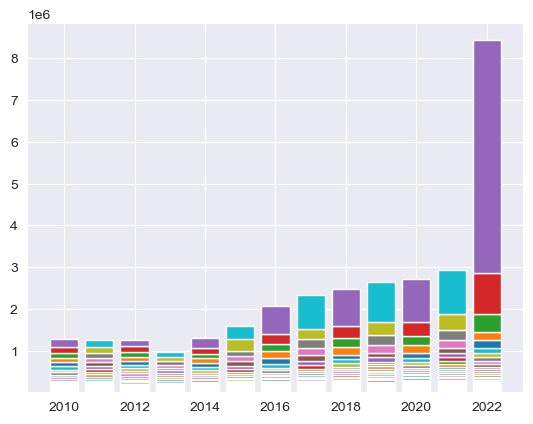

In [115]:
fig, ax = plt.subplots()
x = df_2.columns
for colname in df_2.columns:
    working_series = df_2[colname].sort_values(ascending=True)
    bot_value = 0
    for index, value in working_series.items():
        ax.bar(colname, height=value, bottom=bot_value, label=index)
        bot_value += value
plt.show()

In [116]:
df_2[2010].sort_values(ascending=True)

coo_name
Venezuela (Bolivarian Republic of)          69.0
Gambia                                    1395.0
Libya                                     1922.0
Mali                                      2847.0
Palestinian                               3502.0
Bangladesh                                6012.0
Albania                                   6512.0
Guinea                                    6963.0
Cote d'Ivoire                             7287.0
Nigeria                                   8378.0
Armenia                                  10589.0
China                                    10934.0
Sudan                                    11389.0
Azerbaijan                               12425.0
Ethiopia                                 12915.0
Stateless                                13335.0
Cambodia                                 13595.0
Angola                                   13737.0
Pakistan                                 14136.0
Zimbabwe                                 15484.0
Syrian Arab

In [117]:
data_fill_between = pd.DataFrame({f'{key}_start': np.zeros(len(df_2.index)) for key in df_2.columns}, index=df_2.index)
data_fill_between = data_fill_between.join(pd.DataFrame({f'{key}_end': np.zeros(len(df_2.index)) for key in df_2.columns}, index=df_2.index))
data_fill_between

,2010_start,2011_start,2012_start,2013_start,2014_start,2015_start,2016_start,2017_start,2018_start,2019_start,...,2013_end,2014_end,2015_end,2016_end,2017_end,2018_end,2019_end,2020_end,2021_end,2022_end
coo_name,,,,,,,,,,,,,,,,,,,,,
Syrian Arab Rep.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ukraine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Iraq,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Eritrea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Somalia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Iran (Islamic Rep. of),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Türkiye,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Russian Federation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
for column in df_2.columns:
    start = 0
    for index, value in df_2[column].sort_values(ascending=True).items():
        data_fill_between[f'{column}_start'][index] = start
        data_fill_between[f'{column}_end'][index] = start + value
        start += value

In [119]:
data_fill_between

,2010_start,2011_start,2012_start,2013_start,2014_start,2015_start,2016_start,2017_start,2018_start,2019_start,...,2013_end,2014_end,2015_end,2016_end,2017_end,2018_end,2019_end,2020_end,2021_end,2022_end
coo_name,,,,,,,,,,,,,,,,,,,,,
Syrian Arab Rep.,173426.0,179437.0,269444.0,593034.0,925657.0,996098.0,1401547.0,1514141.0,1580681.0,1681820.0,...,659502.0,1064251.0,1274104.0,2055799.0,2329872.0,2469044.0,2636833.0,2705615.0,2936917.0,2867366.0
Ukraine,190225.0,197482.0,186111.0,95.0,1064251.0,1274104.0,1166152.0,756379.0,604815.0,619928.0,...,2192.0,1298842.0,1591774.0,1401547.0,892031.0,693481.0,675279.0,333266.0,272909.0,8430451.0
Afghanistan,724826.0,638241.0,662386.0,659502.0,704191.0,749378.0,830889.0,1274866.0,1297994.0,1363392.0,...,753203.0,812103.0,869291.0,993396.0,1514141.0,1580681.0,1681820.0,1690542.0,1867622.0,1873113.0
Iraq,949789.0,950557.0,971420.0,847204.0,812103.0,869291.0,993396.0,1063230.0,1077557.0,1133901.0,...,959966.0,925657.0,996098.0,1166152.0,1274866.0,1297994.0,1363392.0,1358085.0,1489481.0,1440113.0
Eritrea,275813.0,377685.0,453280.0,527825.0,531517.0,640611.0,686194.0,892031.0,895720.0,942677.0,...,593034.0,612593.0,749378.0,830889.0,1063230.0,1077557.0,1133901.0,1124897.0,1248172.0,1242443.0
Somalia,542033.0,549520.0,571948.0,753203.0,612593.0,549038.0,589122.0,648030.0,786836.0,833259.0,...,847204.0,704191.0,640611.0,686194.0,756379.0,895720.0,942677.0,830048.0,941967.0,941970.0
Iran (Islamic Rep. of),366665.0,328301.0,401437.0,412465.0,416053.0,433484.0,524612.0,562499.0,693481.0,733401.0,...,462735.0,469562.0,490222.0,589122.0,648030.0,786836.0,833259.0,932783.0,1049442.0,848752.0
Türkiye,823967.0,831017.0,856282.0,316132.0,329081.0,351289.0,341773.0,375088.0,453819.0,675279.0,...,362859.0,372564.0,392353.0,381407.0,416848.0,500750.0,733401.0,651430.0,746981.0,760717.0
Russian Federation,627946.0,731701.0,755564.0,462735.0,469562.0,490222.0,469270.0,508259.0,551056.0,566003.0,...,527825.0,531517.0,549038.0,524612.0,562499.0,604815.0,619928.0,534721.0,668566.0,683164.0


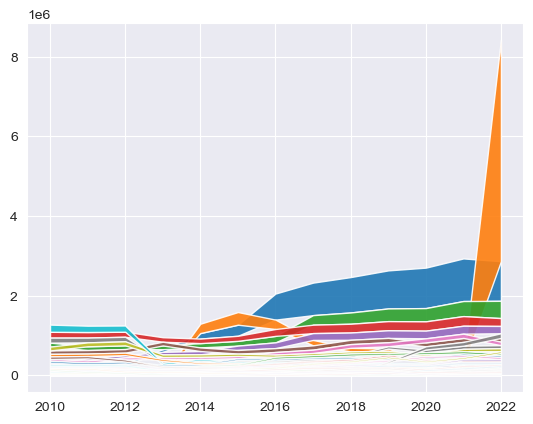

In [120]:
fig, ax = plt.subplots()
x = df_2.columns
for country in data_fill_between.index:
    y_start = data_fill_between.loc[country, [f'{year}_start' for year in df_2.columns]]
    y_end = data_fill_between.loc[country, [f'{year}_end' for year in df_2.columns]]
    #Remove _start, _end from column names
    y_start.index = [year.split('_')[0] for year in y_start.index]
    y_end.index = [year.split('_')[0] for year in y_end.index]
    ax.fill_between(x, y_start, y_end
                    ,label=country,
                    alpha=0.9)